# Exploring Hacker News Posts
   - In this project, we'll work with a data set of submissions to popular technology site [Hacker News](https://news.ycombinator.com/). Hacker News is a site where user-submitted stories (known as `"posts"`) are voted and commented upon.
   - We're specifically interested in posts whose titles begin with either **Ask HN** or **Show HN**. Users submit `Ask HN` posts to ask the Hacker News community a specific question
   - Likewise, users submit `Show HN` posts to show the Hacker News community a project, product, or just generally something interesting.
   - We'll compare these two types of posts (i.e Ask HN posts and Show HN Posts) to determine the following:

        1. Do `Ask HN` or `Show HN` receive more comments on average?

        2. Do posts created at a certain time receive more comments on average?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
news_post = pd.read_csv("news_posts.csv")

In [3]:
news_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
id              20100 non-null int64
title           20100 non-null object
url             17660 non-null object
num_points      20100 non-null int64
num_comments    20100 non-null int64
author          20100 non-null object
created_at      20100 non-null object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


### Convert into datetime datatype

In [4]:
news_post["created_at"] = pd.to_datetime(news_post["created_at"])

In [5]:
news_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
id              20100 non-null int64
title           20100 non-null object
url             17660 non-null object
num_points      20100 non-null int64
num_comments    20100 non-null int64
author          20100 non-null object
created_at      20100 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.1+ MB


## Separate ask_hn and show_hn data

In [6]:
ask_posts = news_post[news_post["title"].str.lower().str.startswith("ask hn")].copy()
show_posts = news_post[news_post["title"].str.lower().str.startswith("show hn")].copy()

In [7]:
ask_posts

,id,title,url,num_points,num_comments,author,created_at
7,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,2016-08-16 09:55:00
17,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,2015-11-22 13:43:00
22,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,2016-05-02 10:14:00
30,12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130,2016-08-02 14:20:00
31,10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak,2015-10-15 16:38:00
...,...,...,...,...,...,...,...
20039,10994357,Ask HN: Is it feasible to port Apple's Swift t...,NaN,3,17,schappim,2016-01-29 09:42:00
20042,12241954,Ask HN: What to do when a developer goes dark?,NaN,3,3,bittysdad,2016-08-07 12:58:00
20045,12029526,Ask HN: Killer app for AR?,NaN,2,2,davidiach,2016-07-04 08:50:00
20048,11227969,Ask HN: How do you balance a serious relations...,NaN,10,4,audace,2016-03-05 01:25:00


In [8]:
show_posts

,id,title,url,num_points,num_comments,author,created_at
13,10627194,Show HN: Wio Link ESP8266 Based Web of Things...,https://iot.seeed.cc,26,22,kfihihc,2015-11-25 14:03:00
39,10646440,Show HN: Something pointless I made,http://dn.ht/picklecat/,747,102,dhotson,2015-11-29 22:46:00
46,11590768,"Show HN: Shanhu.io, a programming playground p...",https://shanhu.io,1,1,h8liu,2016-04-28 18:05:00
84,12178806,Show HN: Webscope Easy way for web developers...,http://webscopeapp.com,3,3,fastbrick,2016-07-28 07:11:00
97,10872799,Show HN: GeoScreenshot Easily test Geo-IP bas...,https://www.geoscreenshot.com/,1,9,kpsychwave,2016-01-09 20:45:00
...,...,...,...,...,...,...,...
19993,11222099,Show HN: Geocoding API built with government o...,https://latlon.io,6,6,evanmarks,2016-03-04 04:50:00
19999,11735438,Show HN: Decorating: Animated pulsed for your ...,https://github.com/ryukinix/decorating,3,1,lerax,2016-05-20 03:48:00
20014,10200913,Show HN: Idea to startup,https://ideatostartup.org,14,17,nikhildaga,2015-09-10 22:17:00
20065,11444393,"Show HN: PhantomJsCloud, Headless Browser SaaS",https://PhantomJsCloud.com,2,1,novaleaf,2016-04-07 03:04:00


In [9]:
ask_avg_com = ask_posts["num_comments"].mean()
show_avg_com = show_posts["num_comments"].mean()

print(ask_avg_com, show_avg_com)

14.038417431192661 10.31669535283993


### Graphical Representation

In [10]:
avg_comm = pd.Series({"ask_com":ask_avg_com, "show_com":show_avg_com})

In [11]:
avg_comm

ask_com     14.038417
show_com    10.316695
dtype: float64

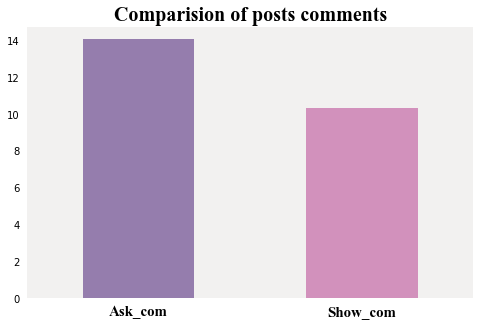

In [12]:
fig, ax = plt.subplots(figsize = (8, 5))
avg_comm.plot.bar( rot = 0, color = ["#957DAD", "#D291BC"] )
font = {'family': 'Times New Roman', 'color':  'black', 'weight': 'normal', 'size': 15}
plt.title("Comparision of posts comments", fontdict = font, fontsize = 20)
ax.set_facecolor(color = "#F2F1F0")
ax.set_xticklabels(["Ask_com", "Show_com"],fontdict = font)
ax.tick_params(left = False, bottom = False)
for value in ax.spines.values():
    value.set_visible(False)
plt.show()

From the above graph, we clearly see that **Ask_HN** recevie more comments than **Show_HN**.

### At which time receive more comments on average?

In [13]:
ask_posts.head()

,id,title,url,num_points,num_comments,author,created_at
7,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,2016-08-16 09:55:00
17,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,2015-11-22 13:43:00
22,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,2016-05-02 10:14:00
30,12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130,2016-08-02 14:20:00
31,10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak,2015-10-15 16:38:00


In [14]:
ask_posts["hours"] = ask_posts["created_at"].dt.hour

In [15]:
ask_posts.head()

,id,title,url,num_points,num_comments,author,created_at,hours
7,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,2016-08-16 09:55:00,9
17,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,2015-11-22 13:43:00,13
22,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,2016-05-02 10:14:00,10
30,12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130,2016-08-02 14:20:00,14
31,10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak,2015-10-15 16:38:00,16


In [16]:
ask_hourly_avg = ask_posts.groupby("hours")["num_comments"].mean().sort_values(ascending = False)

In [17]:
ask_hourly_avg

hours
15    38.594828
2     23.810345
20    21.525000
16    16.796296
21    16.009174
13    14.741176
10    13.440678
14    13.233645
18    13.201835
17    11.460000
1     11.383333
11    11.051724
19    10.800000
8     10.250000
5     10.086957
12     9.410959
6      9.022727
0      8.127273
23     7.985294
7      7.852941
3      7.796296
4      7.170213
22     6.746479
9      5.577778
Name: num_comments, dtype: float64

In [18]:
show_posts["hours"] = show_posts["created_at"].dt.hour

In [19]:
show_hourly_avg = show_posts.groupby("hours")["num_comments"].mean().sort_values(ascending = False)

In [20]:
show_hourly_avg

hours
18    15.770492
0     15.709677
14    13.441860
23    12.416667
22    12.391304
12    11.803279
16    11.655914
7     11.500000
11    11.159091
3     10.629630
20    10.200000
19     9.800000
17     9.795699
9      9.700000
13     9.555556
4      9.500000
6      8.875000
1      8.785714
10     8.250000
15     8.102564
21     5.787234
8      4.852941
2      4.233333
5      3.052632
Name: num_comments, dtype: float64

In [21]:
ask_hourly_com = pd.DataFrame(ask_hourly_avg)
ask_hourly_com.reset_index(inplace = True)

In [22]:
show_hourly_com = pd.DataFrame(show_hourly_avg)
show_hourly_com.reset_index(inplace = True)

In [73]:
ask_hourly_com.head()

,hours,num_comments
0,15,38.594828
1,2,23.810345
2,20,21.525000
3,16,16.796296
4,21,16.009174


In [72]:
show_hourly_com.head()

,hours,num_comments
0,18,15.770492
1,0,15.709677
2,14,13.441860
3,23,12.416667
4,22,12.391304


In [25]:
Hourly_avg_com = ask_hourly_com.merge(show_hourly_com, on = "hours", how = "inner", suffixes = ("_post", "_show"))

In [26]:
Hourly_avg_com.sort_values(by = "hours", inplace = True )

In [27]:
Hourly_avg_com.set_index("hours", inplace = True, )

In [28]:
Hourly_avg_com.index.name = None

In [85]:
Hourly_avg_com.head()

,num_comments_post,num_comments_show
0,8.127273,15.709677
1,11.383333,8.785714
2,23.810345,4.233333
3,7.796296,10.629630
4,7.170213,9.500000


In [93]:
Hourly_avg_com.rename(columns = {"num_comments_post": "Avg_Post_Com", "num_comments_show" : "Avg_Show_Com"}, inplace = True)

In [95]:
Hourly_avg_com.head()

,Avg_Post_Com,Avg_Show_Com
0,8.127273,15.709677
1,11.383333,8.785714
2,23.810345,4.233333
3,7.796296,10.629630
4,7.170213,9.500000


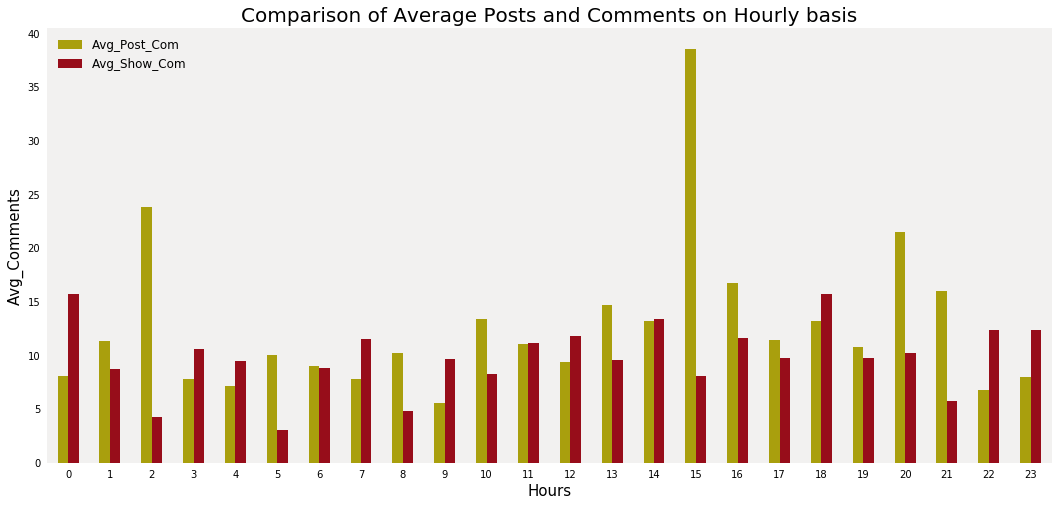

In [119]:
ax = Hourly_avg_com.plot.bar(figsize = (18,8), rot = 0, color = ["#A99F0D", "#970D1A"] )
ax.set_facecolor(color = "#F2F1F0")
ax.set_title("Comparison of Average Posts and Comments on Hourly basis", fontsize = 20)
ax.set_xlabel("Hours", fontsize = 15)
ax.set_ylabel("Avg_Comments", fontsize = 15)
ax.tick_params(bottom = False, left = False)
ax.legend(frameon = False, fontsize = 12, loc = 'upper left')
for value in ax.spines.values():
    value.set_visible(False)

plt.show()

From above graph we conclude that, the best time to recevie more comments on **Ask_HN posts** is **15:00 PM** and the best time to recevie more comments on **Show_HN** is **18:00 PM**. So, if you really wanna recevie more comments on Ask_HN and Show_HN posts on hacker news, than you should posts on those time period.